# Classic Bertalanffy 

https://jmahaffy.sdsu.edu/courses/f15/math337/beamer/linear-04.pdf  
https://en.wikipedia.org/wiki/Ludwig_von_Bertalanffy  


[*********************100%***********************]  1 of 1 completed


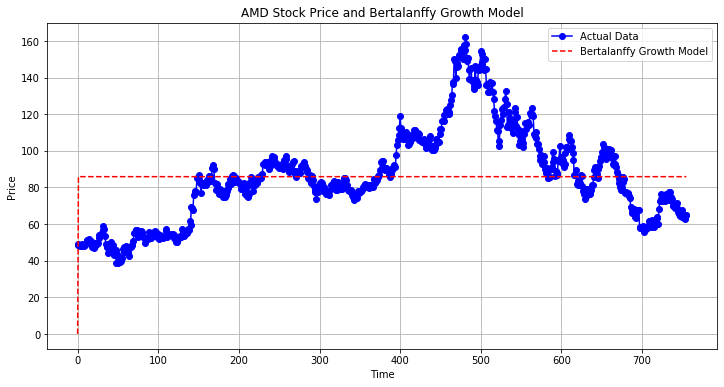

Estimated A: 85.89966874672588
Estimated K: 31.256987099640956
Estimated r: 26.840866339852074


In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Bertalanffy growth model function
def bertalanffy_growth(t, A, K, r):
    return A * (1 - np.exp(-r * t)) ** (1 / K)

# Input
symbol = 'AMD'
start = '2020-01-01'
end = '2023-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Prepare data
data = dataset['Adj Close'].values

# Define time points
t = np.arange(len(data))

# Fit the Bertalanffy growth model to the data
params, params_covariance = curve_fit(bertalanffy_growth, t, data, maxfev=10000)

# Extract the model parameters
A, K, r = params

# Predict the growth using the fitted parameters
predicted_data = bertalanffy_growth(t, A, K, r)

# Plot the actual and predicted data
plt.figure(figsize=(12, 6))
plt.plot(t, data, label='Actual Data', marker='o', linestyle='-', color='b')
plt.plot(t, predicted_data, label='Bertalanffy Growth Model', linestyle='--', color='r')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title(f'{symbol} Stock Price and Bertalanffy Growth Model')
plt.grid(True)
plt.show()

# Display the model parameters
print(f"Estimated A: {A}")
print(f"Estimated K: {K}")
print(f"Estimated r: {r}")